In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [77]:
# Question 2 Part B:

# Input: A peptide sequence
# Input: TSV file containing the mass of the peptides
# Output: Its theoretical mass assuming it has both an N and C terminus

pepMassFile = "C:\\Users\\alexh\\Documents\\Beng_182-203_Scripts\\HW3\\monoisotope.txt"
def peptideMass(peptideSequence,peptideMassFile = pepMassFile ):
    
    # Get peptide masses (mass based on average peptide mass)
    pepmassDict = {}
    pepMassData = open(peptideMassFile,"r").readlines()
    for line in pepMassData:
        pep,mass = line.strip().split("\t")
        pepmassDict[pep]=float(mass)
    
    # Get peptide total mass
    pepMass = 0
    for pep in peptideSequence:
        pepMass += pepmassDict[pep]
        
    # Add N and C Terminus weight
    pepMass += 18
    return pepMass
    
PEPTIDEmass = peptideMass('PEPTIDE')
print(PEPTIDEmass)
PEPTIDEmass = peptideMass('QQPDGLAVVGVFLKVGDANPALQKVLDALDSIKTKGKSTDFPNFDPGSLLPN')                 
print(PEPTIDEmass)
PEPTIDEmass = peptideMass('LKEPISVSSQQMLKFRTLNFNAEGEPELLMLANWRPAQPLKNRQVRG')
print(PEPTIDEmass)
PEPTIDEmass = peptideMass('AVLKDGPLTGTYRLVQFHFHWGSSDDQGSEHTVDRKKYAAELHLVHW')
print(PEPTIDEmass)

799.34944
5433.87213
5433.881519999999
5430.697169999998


In [78]:
# Question 2 Part C:

def getPotentialPeptide (pepMass, protein, ppmError):
    
    error = ppmError/1000000
    
    lb = pepMass - pepMass*error
    ub = pepMass + pepMass*error
    print(lb)
    print(ub)
    #get rough estimate for max an min number of amino acids that could represent the peptide
    minPepLength = int((lb)/186) - 1
    maxPepLength = int((ub)/57) + 1
    

    pepList = []
    closePep= []
    
    for i in range(len(protein)):
        #for j in range(minPepLength,maxPepLength+2): #account for index-1 twice
        #print(i)
        for j in range(1,len(protein)):
            
            if (i + j) > len(protein):
                continue
        
               
            subPepMass = peptideMass(protein[i:(i+j)])
            #for aa in protein[i:(i+j)]:
             #   subPepMass += peptideMass(aa)
            
            if subPepMass <= ub:
                if subPepMass >5350:
                    #print(subPepMass)
                    closePep.append(subPepMass)
                if subPepMass >= lb:
                    #print("hi")
                    pepList.append(protein[i:(i+j)])
            else:
                continue
    closePep.sort()
    
    #print(closePep)
    return pepList

pepList = getPotentialPeptide(5433.78076171, 
                              'MSHHWGYGKHNGPEHWHKDFPIANGERQSPVDIDTKAVVQDPALKPLALVYGEATSRRMVNNGHSFNVEYDDSQDKAVLKDGPLTGTYRLVQFHFHWGSSDDQGSEHTVDRKKYAAELHLVHWNTKYGDFGTAAQQPDGLAVVGVFLKVGDANPALQKVLDALDSIKTKGKSTDFPNFDPGSLLPNVLDYWTYPGSLTTPPLLESVTWIVLKEPISVSSQQMLKFRTLNFNAEGEPELLMLANWRPAQPLKNRQVRGFPK',
                                50)
print(pepList)

5433.5090726719145
5434.052450748085
['QQPDGLAVVGVFLKVGDANPALQKVLDALDSIKTKGKSTDFPNFDPGSLLPN', 'LKEPISVSSQQMLKFRTLNFNAEGEPELLMLANWRPAQPLKNRQVRG']


In [134]:
#Question 2 Part D
def generateSpectrum (peptide):

    bionMod = 1
    yionMod = 19
    xionMod = yionMod + 26
    aionMod = bionMod -28
    zionMod = yionMod-17
    cionMod = bionMod + 17

    mods = [aionMod,bionMod,cionMod,xionMod,yionMod,zionMod]
    maxCharge = 7

    spectrumSplit = []
    spectrumConcatenated = []

    for i in range(1,len(peptide)):
        spectrumSplit.append([])

        abcIon = peptideMass(peptide[:i])-18
        xyzIon = peptideMass(peptide[i:])-18
        #for j in range((i+1)):
            #aaSum+=peptideMass(peptide[j])

        for z in range(1,maxCharge+1):
            spectrumSplit[-1].append([])

            for m in mods[:3]:
                mzRatio = (abcIon+m+z)/z
                spectrumSplit[-1][-1].append(mzRatio)
                spectrumConcatenated.append(mzRatio)
            for m in mods[3:]:
                mzRatio = (xyzIon+m+z)/z
                spectrumSplit[-1][-1].append(mzRatio)
                spectrumConcatenated.append(mzRatio)
    
    return spectrumSplit, spectrumConcatenated

specConcatList = []
specSplitList = []
for pep in pepList:
    spec = generateSpectrum(pep)
    specConcatList.append(spec[1])
    specSplitList.append(spec[0])
print(specConcatList[0])

[102.05858, 130.05858, 147.05858, 5333.81355, 5307.81355, 5290.81355, 51.52929, 65.52929, 74.02929, 2667.406775, 2654.406775, 2645.906775, 34.686193333333335, 44.01952666666667, 49.686193333333335, 1778.6045166666665, 1769.93785, 1764.2711833333333, 26.264645, 33.264645, 37.514645, 1334.2033875, 1327.7033875, 1323.4533875, 21.211716000000003, 26.811716, 30.211716000000003, 1067.56271, 1062.3627099999999, 1058.96271, 17.843096666666668, 22.509763333333336, 25.343096666666668, 889.8022583333333, 885.468925, 882.6355916666666, 15.436940000000002, 19.43694, 21.86551142857143, 762.8305071428571, 759.1162214285714, 756.68765, 230.11716, 258.11716, 275.11716, 5205.754969999999, 5179.754969999999, 5162.754969999999, 115.55858, 129.55858, 138.05858, 2603.3774849999995, 2590.3774849999995, 2581.8774849999995, 77.37238666666667, 86.70572, 92.37238666666667, 1735.918323333333, 1727.2516566666663, 1721.5849899999996, 58.27929, 65.27929, 69.52929, 1302.1887424999998, 1295.6887424999998, 1291.4387424

In [42]:

data = open("C:\\Users\\alexh\\Documents\\Beng_182-203_Scripts\\HW3\\CAH_test_01_scan1133.mgf").readlines()

mz = []
abundance = []

for line in data[5:-2]:
    intLine = [float(x) for x in line.strip().split(" ")]
    mz.append(intLine[0])
    abundance.append(intLine[1])
    


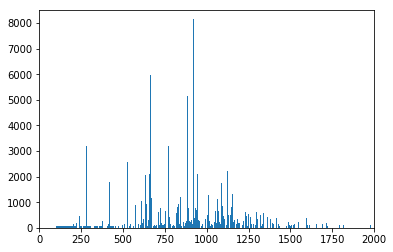

8163.5732421875


In [66]:
plt.axis([0,2000,0,8500])
plt.bar(mz,height = abundance, width = 5)

plt.show()
print(max(abundance))

In [136]:

specDict1 = {}
specDict2 = {}
ionDict =["a","b","c","x","y","z"]
for i in range(len(specConcatList[0])):
    specDict1[specConcatList[0][i]] = [ionDict[i%6], (((i-i%6)/6)%6)+1, ((i-i%36)/36)+1]
for i in range(len(specConcatList[1])):
    specDict2[specConcatList[1][i]] = [ionDict[i%6], (((i-i%6)/6 )%6)+1, ((i-i%36)/36)+1]
    
print (specDict1)

{102.05858: ['a', 1.0, 1.0], 130.05858: ['b', 1.0, 1.0], 147.05858: ['c', 1.0, 1.0], 5333.81355: ['x', 1.0, 1.0], 5307.81355: ['y', 1.0, 1.0], 5290.81355: ['z', 1.0, 1.0], 51.52929: ['a', 2.0, 1.0], 65.52929: ['b', 2.0, 1.0], 74.02929: ['c', 2.0, 1.0], 2667.406775: ['x', 2.0, 1.0], 2654.406775: ['y', 2.0, 1.0], 2645.906775: ['z', 2.0, 1.0], 34.686193333333335: ['a', 3.0, 1.0], 44.01952666666667: ['b', 3.0, 1.0], 49.686193333333335: ['c', 3.0, 1.0], 1778.6045166666665: ['x', 3.0, 1.0], 1769.93785: ['y', 3.0, 1.0], 1764.2711833333333: ['z', 3.0, 1.0], 26.264645: ['a', 4.0, 1.0], 33.264645: ['b', 4.0, 1.0], 37.514645: ['c', 4.0, 1.0], 1334.2033875: ['x', 4.0, 1.0], 1327.7033875: ['y', 4.0, 1.0], 1323.4533875: ['z', 4.0, 1.0], 21.211716000000003: ['a', 5.0, 1.0], 26.811716: ['b', 5.0, 1.0], 30.211716000000003: ['c', 5.0, 1.0], 1067.56271: ['x', 5.0, 1.0], 1062.3627099999999: ['y', 5.0, 1.0], 1058.96271: ['z', 5.0, 1.0], 17.843096666666668: ['a', 6.0, 1.0], 22.509763333333336: ['b', 6.0, 1.

In [124]:
print (specDict1[100.44367])
print (specDict2[100.44367])

KeyError: 100.44367

In [145]:
specAnalysis = []
specCount = 0
for spec in specConcatList:
    spec.sort()
    specList = []
    specDict = {}
    if specCount ==0:
        specDict = specDict1
    else:
        specDict=specDict2
    for m in range(len(mz)):
        for i in range(len(spec)):
            if spec[i] > mz[m]:
                if i > 0:
                    #print(spec[i])
                    if (spec[i] - mz[m]) > (mz[m] - spec[i-1]) and (mz[m] - spec[i-1]) <.2:
                        specList.append([mz[m],abundance[m],spec[i-1]]+specDict[spec[i-1]])
                    else:
                        if (spec[i] - mz[m]) < .2:
                            specList.append([mz[m],abundance[m],spec[i]]+specDict[spec[i]])
                break
    specCount+=1
    specAnalysis.append(specList)

In [146]:
outfiles = ["C:\\Users\\alexh\\Documents\\Beng_182-203_Scripts\\HW3\\spec1_Cut.txt", "C:\\Users\\alexh\\Documents\\Beng_182-203_Scripts\\HW3\\spec2_Cut.txt"]
for i in range(len(outfiles)):
    out = open(outfiles[i],"w")
    out.write("mz\tabundance\tspec\tion\tcharge\tposition\n")
    for line in specAnalysis[i]:
        outStr ="\t".join([str(x) for x in line]) +"\n"
        out.write(outStr)
                
    out.close()

In [139]:
outfiles = ["C:\\Users\\alexh\\Documents\\Beng_182-203_Scripts\\HW3\\spec1_Dist.txt", "C:\\Users\\alexh\\Documents\\Beng_182-203_Scripts\\HW3\\spec2_Dist.txt"]
count = 0
for i in range(2):
    if count ==0:
        specDict = specDict1
    else:
        specDict = specDict2
    out = open(outfiles[i],"w")
    out.write("spec\tion\tcharge\tposition\n")
    for s in specDict:
        outStr = str(s) +"\t"+"\t".join([str(x) for x in specDict[s]]) + "\n"
        out.write(outStr)
    out.close()
    count +=1


In [140]:
for i in pepList:
    print(len(i))

52
47


In [143]:
pepList[0][:21]

'QQPDGLAVVGVFLKVGDANPA'